In [30]:
#import all require libs
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.ExcelFile("Data Analysis Exercise with Prices.xlsx")


In [32]:
#read dataframes
transactions = pd.read_excel(df, 'trans')


In [33]:
price = pd.read_excel(df, 'Prices')


In [34]:
#check the first rows in data 
transactions.head()

,الشهر,المنطقة,المحطة,WOID,TrnID,Customer Name,Customer_Code,Project Name,Project Location,Order Quantity,...,Pumped Quantity,Pump Operator code,Pump Operator Name,Truck Name,Truck Quantity,User Name,week,Time,Mixer ahmed Ragab,TM
0,إبريل,F,F,5141.0,33289.0,اوراسكوم للانشاءات,100025,NaN,قاعده محطه 12,420.0,...,0.0,NaN,NaN,TM178,10.0,محمودعبدالمنعم احمد,17,23:37:19,TMTM178,TM
1,إبريل,F,F,5141.0,33288.0,اوراسكوم للانشاءات,100025,NaN,قاعده محطه 12,420.0,...,0.0,NaN,NaN,TM181,10.0,محمودعبدالمنعم احمد,17,23:26:22,TMTM181,TM
2,إبريل,F,F,5141.0,33287.0,اوراسكوم للانشاءات,100025,NaN,قاعده محطه 12,420.0,...,0.0,NaN,NaN,TM182,10.0,محمودعبدالمنعم احمد,17,23:19:00,TMTM182,TM
3,إبريل,F,F,5141.0,33286.0,اوراسكوم للانشاءات,100025,NaN,قاعده محطه 12,420.0,...,0.0,NaN,NaN,TM182,10.0,محمودعبدالمنعم احمد,17,22:57:34,TMTM182,TM
4,إبريل,F,F,5141.0,33285.0,اوراسكوم للانشاءات,100025,NaN,قاعده محطه 12,420.0,...,0.0,NaN,NaN,TM180,10.0,محمودعبدالمنعم احمد,17,22:54:56,TMTM180,TM


In [35]:
#check the first rows in data 
price.head()

,Customer Name,Customer_Code,Cement Type,Project Location,Price,Valid From,Valid To,Unnamed: 7,Unnamed: 8,Unnamed: 9,Project Location.1,NOTES
0,A.S.G.C. LLENSHAT,1000660,C/150/OPC/C,الشعفار,120,01.01.2021,03.01.2022,NaN,5.0,NaN,الشعفار,NaN
1,A.S.G.C. LLENSHAT,1000660,C/150/OPC/C,الشعفار,115,04.01.2022,16.01.2022,NaN,NaN,NaN,مجرى العيون,Higher than الشعفار by 15 EGP
2,A.S.G.C. LLENSHAT,1000660,C/150/OPC/C,الشعفار,110,16.01.2022,31.12.9999,NaN,NaN,NaN,الكيت كات,NaN
3,A.S.G.C. LLENSHAT,1000660,C0/150/OPC,الشعفار,150,01.01.2021,03.01.2022,NaN,NaN,NaN,سيتاديل,NaN
4,A.S.G.C. LLENSHAT,1000660,C0/150/OPC,الشعفار,145,04.01.2022,16.01.2022,NaN,NaN,NaN,imbaba workshop,Higher than ماسبيرو By 12 EGP


In [36]:
#join tow table
all_data = pd.merge(transactions, price, on = 'Customer_Code', how="inner")


In [37]:
#check all columns after join
all_data.columns

Index(['الشهر', 'المنطقة', 'المحطة', 'WOID', 'TrnID', 'Customer Name_x',
       'Customer_Code', 'Project Name', 'Project Location_x', 'Order Quantity',
       'Cement Type_x', 'Cement Content', 'Strength', 'Early Strength', 'Ice',
       'Temperature', 'Cementitious Materials', 'Special Admixtures',
       'WorkorderTime', 'الورديه', 'Driver Name', 'Truck no', 'Pump Name',
       'Pumped Quantity', 'Pump Operator code', 'Pump Operator Name',
       'Truck Name', 'Truck Quantity', 'User Name', 'week', 'Time',
       'Mixer ahmed Ragab', 'TM', 'Customer Name_y', 'Cement Type_y',
       'Project Location_y', 'Price', 'Valid From', 'Valid To', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Project Location.1', 'NOTES'],
      dtype='object')

In [38]:
# Drop columns I don't need it for analysis
all_data.drop('Ice', axis=1, inplace =True) 
all_data.drop('Temperature', axis=1, inplace =True) 
all_data.drop('Driver Name', axis=1, inplace =True) 
all_data.drop('Truck no', axis=1, inplace =True) 
all_data.drop('Pump Operator code', axis=1, inplace =True) 
all_data.drop('Unnamed: 7', axis=1, inplace =True) 
all_data.drop('Unnamed: 8', axis=1, inplace =True)
all_data.drop('Unnamed: 9', axis=1, inplace =True)
all_data.drop('NOTES', axis=1, inplace =True)

In [39]:
all_data.columns

Index(['الشهر', 'المنطقة', 'المحطة', 'WOID', 'TrnID', 'Customer Name_x',
       'Customer_Code', 'Project Name', 'Project Location_x', 'Order Quantity',
       'Cement Type_x', 'Cement Content', 'Strength', 'Early Strength',
       'Cementitious Materials', 'Special Admixtures', 'WorkorderTime',
       'الورديه', 'Pump Name', 'Pumped Quantity', 'Pump Operator Name',
       'Truck Name', 'Truck Quantity', 'User Name', 'week', 'Time',
       'Mixer ahmed Ragab', 'TM', 'Customer Name_y', 'Cement Type_y',
       'Project Location_y', 'Price', 'Valid From', 'Valid To',
       'Project Location.1'],
      dtype='object')

# Calculating Recency


In [14]:
#Here we are calculating recency for customers who had made a purchase with a company.

df_recency = all_data.groupby(by='Customer Name_y', as_index=False)['WorkorderTime'].max()
df_recency.columns = ['Customer Name', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
lambda x: (recent_date - x).days)
df_recency.head(15)

,Customer Name,LastPurchaseDate,Recency
0,A.S.G.C. LLENSHAT,2022-03-14 17:56:39,44
1,CAIRO METRO LINE3,2022-04-20 05:53:36,8
2,DETAC,2022-04-27 16:45:38,0
3,Ethad Roaad Elhandasa,2022-04-28 07:52:07,0
4,Greater Cairo Metro,2022-04-27 16:51:41,0
5,H A Roads And Bridges,2022-04-20 12:11:18,7
6,Hassan Alaam,2022-04-13 09:24:31,14


# Calculating Frequency


In [40]:
# We are here calculating the frequency of frequent transactions of the customer in ordering some product from the company.
frequency_df = all_data.groupby(by=['Customer Name_y'], as_index=False)['TrnID'].count()
frequency_df.columns = ['Customer Name', 'Frequency']
frequency_df.head(10)

,Customer Name,Frequency
0,A.S.G.C. LLENSHAT,22890
1,CAIRO METRO LINE3,171
2,DETAC,3945
3,Ethad Roaad Elhandasa,92276
4,Greater Cairo Metro,12380
5,H A Roads And Bridges,66250
6,Hassan Alaam,620


# Calculating Monetary Value


In [16]:
# Here we are calculating the monetary value of customer spend on purchasing products from the company.
monetary_df = all_data.groupby(by='Customer Name_y', as_index=False)['Price'].sum()
monetary_df.columns = ['Customer Name', 'Monetary']
monetary_df.head(10)

,Customer Name,Monetary
0,A.S.G.C. LLENSHAT,3189340
1,CAIRO METRO LINE3,29355
2,DETAC,585175
3,Ethad Roaad Elhandasa,16889222
4,Greater Cairo Metro,2025987
5,H A Roads And Bridges,13655475
6,Hassan Alaam,106826


In [17]:
rf_df = df_recency.merge(frequency_df, on='Customer Name')
rfm_df = rf_df.merge(monetary_df, on='Customer Name').drop(columns='LastPurchaseDate')
rfm_df

,Customer Name,Recency,Frequency,Monetary
0,A.S.G.C. LLENSHAT,44,22890,3189340
1,CAIRO METRO LINE3,8,171,29355
2,DETAC,0,3945,585175
3,Ethad Roaad Elhandasa,0,92276,16889222
4,Greater Cairo Metro,0,12380,2025987
5,H A Roads And Bridges,7,66250,13655475
6,Hassan Alaam,14,620,106826


# Ranking Customer’s based upon their recency, frequency, and monetary score


In [18]:
# Here we are normalizing the rank of the customers within a company to analyze the ranking.
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head(10)

,Customer Name,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,A.S.G.C. LLENSHAT,44,22890,3189340,16.666667,71.428571,71.428571
1,CAIRO METRO LINE3,8,171,29355,50.000000,14.285714,14.285714
2,DETAC,0,3945,585175,100.000000,42.857143,42.857143
3,Ethad Roaad Elhandasa,0,92276,16889222,100.000000,100.000000,100.000000
4,Greater Cairo Metro,0,12380,2025987,100.000000,57.142857,57.142857
5,H A Roads And Bridges,7,66250,13655475,66.666667,85.714286,85.714286
6,Hassan Alaam,14,620,106826,33.333333,28.571429,28.571429


# Calculating RFM score


RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15Recency score + 0.28Frequency score + 0.57 *Monetary score

In [19]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['Customer Name', 'RFM_Score']].head(10)

,Customer Name,RFM_Score
0,A.S.G.C. LLENSHAT,3.16
1,CAIRO METRO LINE3,0.98
2,DETAC,2.57
3,Ethad Roaad Elhandasa,5.00
4,Greater Cairo Metro,3.18
5,H A Roads And Bridges,4.14
6,Hassan Alaam,1.46


# Rating Customer based upon the RFM score


* rfm score >4.5 : Top Customer
* 4.5 > rfm score > 4 : High Value Customer
* 4>rfm score >3 : Medium value customer
* 3>rfm score>1.6 : Low-value customer
* rfm score<1.6 :Lost Customer

In [20]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, "Top Customers", (np.where(rfm_df['RFM_Score'] > 4, "High value Customer", (np.where(rfm_df['RFM_Score'] > 3, "Medium Value Customer", np.where(rfm_df['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers'))))))
rfm_df[['Customer Name', 'RFM_Score', 'Customer_segment']].head(10)

,Customer Name,RFM_Score,Customer_segment
0,A.S.G.C. LLENSHAT,3.16,Medium Value Customer
1,CAIRO METRO LINE3,0.98,Lost Customers
2,DETAC,2.57,Low Value Customers
3,Ethad Roaad Elhandasa,5.00,Top Customers
4,Greater Cairo Metro,3.18,Medium Value Customer
5,H A Roads And Bridges,4.14,High value Customer
6,Hassan Alaam,1.46,Lost Customers


CAIRO METRO LINE3, Hassan Alaam, DETAC and A.S.G.C. LLENSHAT this is our goals to make them (top customers) or at least (High value Customer)
but we must know why this custmoer are not top customer to take descision whith them?



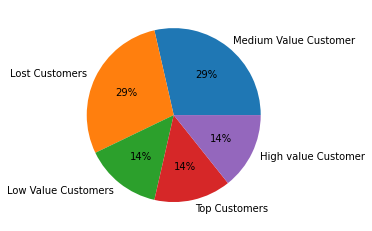

In [21]:
#visualize customer segments
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

Text(0, 0.5, 'Total Price')

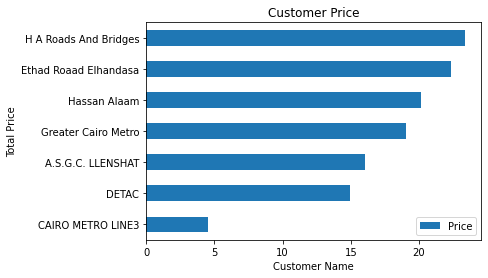

In [22]:
#create DataFrame total price for each company 
df_customer = pd.DataFrame(all_data.groupby('Customer Name_y')['Price'].std())
df_customer.columns = ['Price']
df_customer.sort_values(by='Price',ascending=True).plot(kind="barh")

#visualize Total price for each customer 
plt.title('Customer Price')
plt.xlabel('Customer Name')
plt.ylabel("Total Price")

In [23]:
#create DataFrame total price for each company 
df_customer = pd.DataFrame(all_data.groupby('الورديه')['Price'].std())
df_customer.columns = ['Price']
df_customer

,Price
الورديه,
الورديه المسائيه,31.816222
الورديه النهاريه,28.460614


<AxesSubplot:ylabel='Pump Name'>

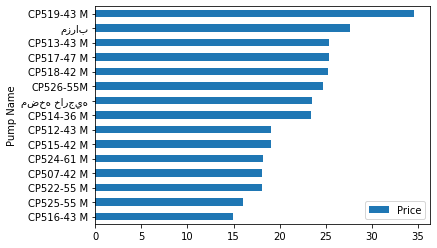

In [24]:
#create DataFrame total price for each company 
df_customer = pd.DataFrame(all_data.groupby('Pump Name')['Price'].std())
df_customer.columns = ['Price']

df_customer.sort_values(by='Price',ascending=True).plot(kind="barh")

#visualize Total price for each customer 

<AxesSubplot:xlabel='week'>

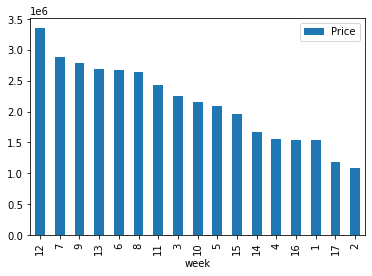

In [25]:
#create DataFrame total price for each company 
df_customer = pd.DataFrame(all_data.groupby('week')['Price'].sum())
df_customer.columns = ['Price']

#visualize Total price for each customer 
df_customer.sort_values(by='Price',ascending=False).plot(kind="bar")


<AxesSubplot:xlabel='Special Admixtures'>

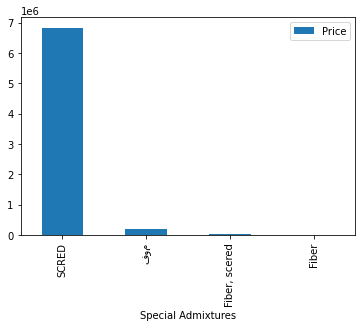

In [26]:
#create DataFrame total price for each company 
df_customer = pd.DataFrame(all_data.groupby('Special Admixtures')['Price'].sum())
df_customer.columns = ['Price']

#visualize Total price for each customer 
df_customer.sort_values(by='Price',ascending=False).plot(kind="bar")


<AxesSubplot:ylabel='الشهر'>

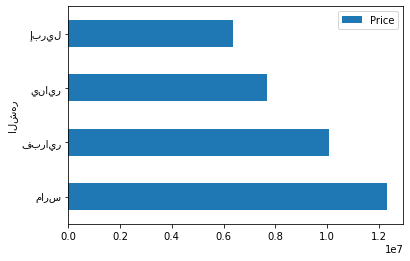

In [27]:
#create DataFrame total price for each company 
df_customer = pd.DataFrame(all_data.groupby('الشهر')['Price'].sum())
df_customer.columns = ['Price']

#visualize Total price for each customer 
df_customer.sort_values(by='Price',ascending=False).plot(kind="barh")

In [28]:
df_customer

,Price
الشهر,
إبريل,6368684
فبراير,10084625
مارس,12337729
يناير,7690342


In [29]:
all_data.to_csv('dataAhmed')